This notebook example comes frome [Naive Bayes Classifier Tutorial: with Python Scikit-learn | DataCamp](https://www.datacamp.com/tutorial/naive-bayes-scikit-learn)

Hoping to consolidate the learning from this chapter by running through the concepts using a different example.

### Generating the Dataset
Scikit-learn provides us with a machine learning ecosystem so that you can generate the dataset and evaluate various machine learning algorithms. 

In our case, we are creating a dataset with six features, three classes, and 800 samples using the `make_classification` function. 

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

In [5]:
X.shape

(800, 6)

In [4]:
len(y)

800

### Train Test Split
Before we start the training process, we need to split the dataset into training and testing for model evaluation. 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

### Model Building and Training 
Build a generic Gaussian Naive Bayes and train it on a training dataset. After that, feed a random test sample to the model to get a predicted value.

In [8]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


### Model Evaluation
We will not evolve the model on an unseen test dataset. First, we will predict the values for the test dataset and use them to calculate accuracy and F1 score. 

In [11]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


Our model has performed fairly well with default hyperparameters. 

To visualize the Confusion matrix, we will use `confusion_matrix` to calculate the true positives and true negatives and `ConfusionMatrixDisplay` to display the confusion matrix with the labels.

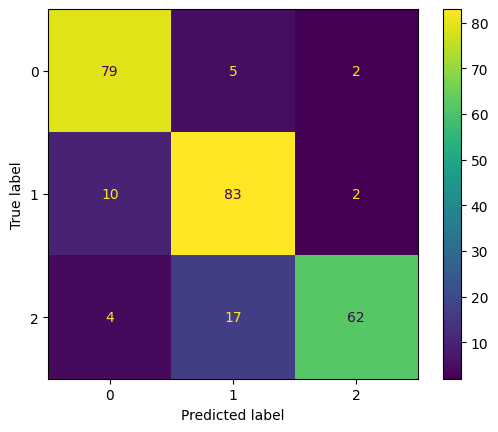

In [12]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Our model has performed quite well, and we can improve model performance by scaling, preprocessing cross-validations, and hyperparameter optimization. 



# Using Kaggle dataset - loans data

Download data from Kaggle 

In [237]:
# help functions
# Density plot of data.
def plot_density(df, col_name):
    mean_value = df[col_name].mean()
    median_value = df[col_name].median()

    plt.figure(figsize=(10, 6))
    df[col_name].plot(kind='density', title=f'Density Plot of {col_name}')
    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
    # Adding annotations
    # plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value*1.3, 0.05), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
    # plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, 2.5), xytext=(median_value*1.3, 2.55), arrowprops=dict(facecolor='green', shrink=0.05), color='green')
                    
    # plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value + 0.5, 0.05),

    #                 arrowprops=dict(facecolor='red', shrink=0.05), color='red')
    # plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, 0), xytext=(median_value - 0.5, 0.05),
    #                 arrowprops=dict(facecolor='green', shrink=0.05), color='green')
    plt.xlabel(col_name)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    

In [299]:
def plot_akde(df, col_name, title = None):
    # using akde
    # from akde import akde
    pdf, meshgrids, bandwith = akde(df[col_name].to_numpy().reshape(-1,1).astype(np.float64))
    pdf = pdf.reshape(meshgrids[0].shape)

    # Plot the density estimation, true distribution, and histogram
    plt.figure(figsize=(8, 5))
    plt.plot(meshgrids[0], pdf, label="AKDE", color='blue', linewidth=2)
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()
    

In [ ]:
import kagglehub
import os
from pyhere import here
import matplotlib.pyplot as plt

# os.environ["KAGGLE_USERNAME"] = "itssuru"
# os.environ["KAGGLE_KEY"] = "22142238293713282860800134952177"
os.environ["KAGGLEHUB_CACHE"] = str(here("data", "ch02"))
# Download latest version
path = kagglehub.dataset_download("itssuru/loan-data")

print("Path to dataset files:", path)

100%|██████████| 213k/213k [00:00<00:00, 630kB/s]

Extracting files...
Path to dataset files: /Users/vincent/Programming/python/Python-Machine-Learning-by-Example-Fourth-Edition/data/ch02/datasets/itssuru/loan-data/versions/1


In [ ]:
import jsonschema2md
import json

parser = jsonschema2md.Parser(
    examples_as_yaml=False,
    show_examples="all",
)

# metadata needs to be downloaded manuallly from kaggle
# https://www.kaggle.com/datasets/itssuru/loan-data

with open(here('data', 'ch02', 'datasets', 'itssuru', 'loan-data', 'metadata.json'), "r") as json_file:
    md_lines = parser.parse_schema(json.load(json_file))
print(''.join(md_lines))
# md_lines = parser.parse_schema(metadata)
# display(md_lines)

# JSON Schema

*# About the data and what to do…

publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, **as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.**

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/investing/peer-to-peer).

Here are what the columns represent:

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more

In [ ]:
metadata_dictionary = {
    "credit.policy": "1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.",
    "purpose": "The purpose of the loan (takes values 'credit_card', 'debt_consolidation', 'educational', 'major_purchase', 'small_business', and 'all_other').",
    "int.rate": "The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.",
    "installment": "The monthly installments owed by the borrower if the loan is funded.",
    "log.annual.inc": "The natural log of the self-reported annual income of the borrower.",
    "dti": "The debt-to-income ratio of the borrower (amount of debt divided by annual income).",
    "fico": "The FICO credit score of the borrower.",
    "days.with.cr.line": "The number of days the borrower has had a credit line.",
    "revol.bal": "The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).",
    "revol.util": "The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).",
    "inq.last.6mths": "The borrower's number of inquiries by creditors in the last 6 months.",
    "delinq.2yrs": "The number of times the borrower had been 30+ days past due on a payment in the past 2 years.",
    "pub.rec": "The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)."
}

In [60]:
import pandas as pd
from pyhere import here

df = pd.read_csv(here('data', 'ch02', 'loan_data.csv'))
df.head()

,index,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [66]:
# try and add metadata to dataframe
metadata_dictionary = {
    "credit.policy": "1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.",
    "purpose": "The purpose of the loan (takes values 'credit_card', 'debt_consolidation', 'educational', 'major_purchase', 'small_business', and 'all_other').",
    "int.rate": "The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.",
    "installment": "The monthly installments owed by the borrower if the loan is funded.",
    "log.annual.inc": "The natural log of the self-reported annual income of the borrower.",
    "dti": "The debt-to-income ratio of the borrower (amount of debt divided by annual income).",
    "fico": "The FICO credit score of the borrower.",
    "days.with.cr.line": "The number of days the borrower has had a credit line.",
    "revol.bal": "The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).",
    "revol.util": "The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).",
    "inq.last.6mths": "The borrower's number of inquiries by creditors in the last 6 months.",
    "delinq.2yrs": "The number of times the borrower had been 30+ days past due on a payment in the past 2 years.",
    "pub.rec": "The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)."
}

df.attrs['metadata'] = metadata_dictionary

In [117]:
def print_col_metadata(df, col_name):
    """
    Prints the metadata for a specified column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the column metadata.
    col_name (str or int): The name or index of the column for which to print metadata.

    Returns:
    None

    Raises:
    KeyError: If the column name or index does not exist in the DataFrame.
    TypeError: If the column name is not a string or the column index is not an integer.
    ValueError: If the column index is out of the valid range.

    Notes:
    - The DataFrame must have an 'attrs' attribute with a 'metadata' dictionary.
    - The 'metadata' dictionary should contain keys corresponding to the column names or indices.
    - If the column index is provided, it should be 1-based (i.e., the first column index is 1).
    """
    if type(col_name) is int and (col_name <= 0 or col_name > len(df.columns)):
        print('Error: invalid column index')
        print(f'Column index must be between 1 and {len(df.columns)}')
    else:
        if type(col_name) is str:
            print(f'Column name: "{col_name}"')
            print(df.attrs['metadata'][col_name])
        else:
            print(f'Column name: "{df.columns[col_name]}"')
            print(df.attrs['metadata'][df.columns[col_name]])

print_col_metadata(df,'credit.policy')

Column name: "credit.policy"
1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              100 non-null    int64  
 1   credit.policy      100 non-null    int64  
 2   purpose            100 non-null    object 
 3   int.rate           100 non-null    float64
 4   installment        100 non-null    float64
 5   log.annual.inc     100 non-null    float64
 6   dti                100 non-null    float64
 7   fico               100 non-null    int64  
 8   days.with.cr.line  100 non-null    float64
 9   revol.bal          100 non-null    int64  
 10  revol.util         100 non-null    float64
 11  inq.last.6mths     100 non-null    int64  
 12  delinq.2yrs        100 non-null    int64  
 13  pub.rec            100 non-null    int64  
 14  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 11.8+ KB


In [112]:
df.head()

,index,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Univariate exploratory data analysis

In [440]:
# create a list that keeps track of which column number is next for EDA
def make_column_tracker(df):
    """
    Creates a column tracker function for a given DataFrame.

    This function returns a wrapper function that keeps track of the next column
    index to be processed in the DataFrame. It ensures that each column is processed
    only once and provides a mechanism to check if all columns have been processed.

    Parameters:
    df (pandas.DataFrame): The DataFrame for which the column tracker is created.

    Returns:
    function: A wrapper function that returns the next column index to be processed.
              If all columns have been processed, it prints a message and returns None.

    Example:
    >>> import pandas as pd
    >>> df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
    >>> tracker = make_column_tracker(df)
    >>> tracker()
    1
    >>> tracker()
    2
    >>> tracker()
    All columns have been processed
    None
    """    
    minimum = -0.1
    maximum = len(df.columns)
    next_column = 1
    def wrapper():
        nonlocal next_column
        if next_column >= maximum:
            print('All columns have been processed')
            return None
        elif next_column < minimum:
            print('Column number should be greater than 0')
            return None
        else:
            return_value = next_column
            next_column += 1
            return return_value
    def display_internals():
        print(f'next_column: {next_column}')
        print(f'minimum: {minimum}')
        print(f'maximum: {maximum}')
    wrapper.display_internals = display_internals
    return wrapper

# next_col = make_column_tracker(df)

In [441]:
next_col.display_internals()

next_column: 1
minimum: -0.1
maximum: 15


In [535]:
# create a function for printing the start of the EDA for a column
def print_eda_start(df, col_number):
    col_name = df.columns[col_number]
    description = ''
    # check if col_name in key of metadata
    if 'metadata' in df.attrs and col_name in df.attrs['metadata']:
        description = df.attrs['metadata'][col_name]
    else:
        description = 'No description available'

    meta_data = df.attrs['metadata'][df.columns[col_number]] if 'metadata' in df.attrs and df.columns[col_number] in df.attrs['metadata'] else ''
    # text = f"### EDA for **{df.columns[col_number]}** - ({col_number}/{len(df.columns) - 1}) \n #### {df.attrs['metadata'][df.columns[col_number]]}"
    text = f"### EDA for **{col_name}** - ({col_number}/{len(df.columns) - 1}) \n #### {description}"    
    display(Markdown(text))
    return df.columns[col_number]
    # print(text)

In [536]:
# create tracker function
next_col = make_column_tracker(df)

In [537]:

col_name = print_eda_start(df, col_number = next_col())

### EDA for **credit.policy** - (1/14) 
 #### 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

In [538]:
df[col_name].value_counts()


credit.policy
1    100
Name: count, dtype: int64

The 'policy.credit' column has all '1's and no '0'. This indicates that all the customers in this dataset has met the credit underwriting criteiteria of LendingClub.com and has been given the credit.

In [539]:
col_name = print_eda_start(df, next_col())

### EDA for **purpose** - (2/14) 
 #### The purpose of the loan (takes values 'credit_card', 'debt_consolidation', 'educational', 'major_purchase', 'small_business', and 'all_other').

In [540]:
# col_name = df.columns[col_number]
df[col_name].value_counts()

purpose
debt_consolidation    28
credit_card           23
all_other             23
home_improvement      13
small_business         8
educational            3
major_purchase         2
Name: count, dtype: int64

In [541]:
df[col_name].value_counts(normalize=True)
# normalize is the same as dividing by the length of the dataframe

purpose
debt_consolidation    0.28
credit_card           0.23
all_other             0.23
home_improvement      0.13
small_business        0.08
educational           0.03
major_purchase        0.02
Name: proportion, dtype: float64

<Axes: title={'center': 'Purpose of loan'}, xlabel='purpose'>

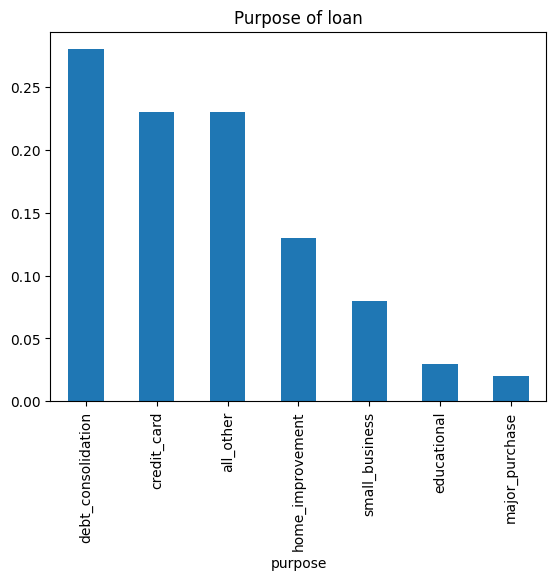

In [542]:
# df[col_name].value_counts().plot(kind='bar')
df[col_name].value_counts(normalize=True).plot(kind='bar', title="Purpose of loan")

The majority of loans are for debt consolidation, credit card and other reasons.

In [543]:
col_name = print_eda_start(df, next_col())

### EDA for **int.rate** - (3/14) 
 #### The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

In [544]:
df[col_name]

0     0.1189
1     0.1071
2     0.1357
3     0.1008
4     0.1426
       ...  
95    0.0775
96    0.1154
97    0.0807
98    0.0807
99    0.0933
Name: int.rate, Length: 100, dtype: float64

In [545]:
df[col_name].describe()

count    100.000000
mean       0.101028
std        0.023150
min        0.071400
25%        0.080700
50%        0.096400
75%        0.115400
max        0.159600
Name: int.rate, dtype: float64

The mean interest rate is 10.1% and median is 9.64%. The maximum interest rate is 15.96%.

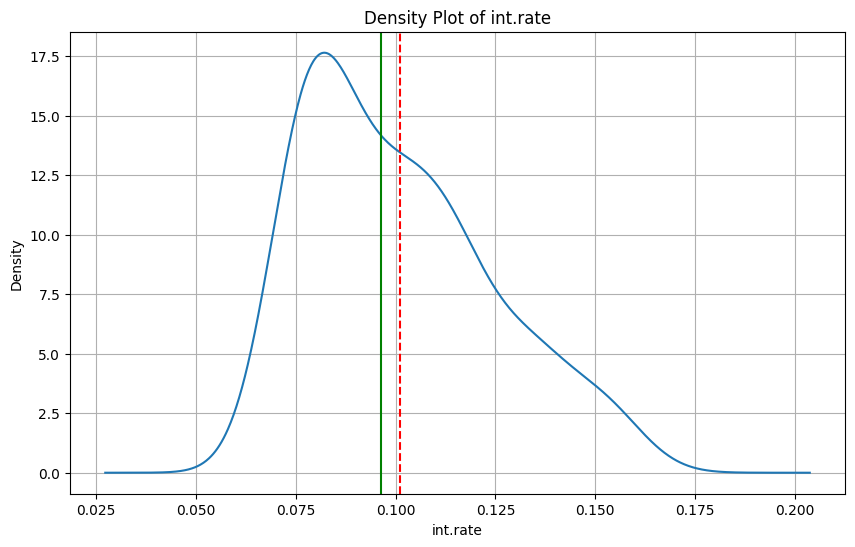

In [546]:
plot_density(df, col_name)
# import matplotlib.pyplot as plt

# mean_value = df[col_name].mean()
# median_value = df[col_name].median()

# plt.figure(figsize=(10, 6))
# df[col_name].plot(kind='density', title=f'Density Plot of {col_name}')
# plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
# plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
# # Adding annotations
# plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value*1.3, 0.05), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
# plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, 2.5), xytext=(median_value*1.3, 2.55), arrowprops=dict(facecolor='green', shrink=0.05), color='green')
                
# # plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value + 0.5, 0.05),

# #                 arrowprops=dict(facecolor='red', shrink=0.05), color='red')
# # plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, 0), xytext=(median_value - 0.5, 0.05),
# #                 arrowprops=dict(facecolor='green', shrink=0.05), color='green')
# plt.xlabel(col_name)
# plt.ylabel('Density')
# plt.grid(True)
# plt.show()

In [547]:
# get the trimmed mean
from scipy.stats import trim_mean
trim_amount = 0.2
trim_mean_value = trim_mean(df[col_name], proportiontocut=trim_amount)
print(f'The {trim_amount:.0%} trimmed mean: {trim_mean_value:.2f}')

The 20% trimmed mean: 0.10


The denisty plot for interest rate reveals a right-skewed distribution. However, the mean, median and 20% trimmed mean are the same, 0.10 to two decimal places.

In [548]:
col_name = print_eda_start(df, next_col())

### EDA for **installment** - (4/14) 
 #### The monthly installments owed by the borrower if the loan is funded.

In [549]:
df[col_name]

0     829.10
1     228.22
2     366.86
3     162.34
4     102.92
       ...  
95    156.11
96    329.95
97    313.67
98    297.99
99    239.65
Name: installment, Length: 100, dtype: float64

In [550]:
df[col_name].describe()

count    100.000000
mean     227.940000
std      162.367679
min       32.550000
25%      124.745000
50%      160.615000
75%      301.910000
max      829.100000
Name: installment, dtype: float64

The mean monthly installment payment is $227.94 and median is $160.62. This means the data is right-skewed.

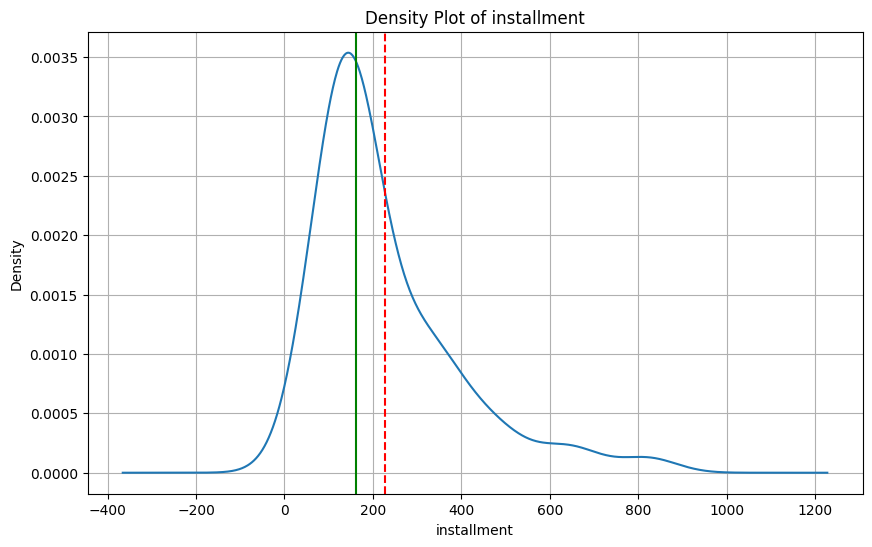

In [551]:
plot_density(df, col_name)
# # Density plot of data.
# mean_value = df[col_name].mean()
# median_value = df[col_name].median()

# plt.figure(figsize=(10, 6))
# df[col_name].plot(kind='density', title=f'Density Plot of {col_name}')
# plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
# plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
# # Adding annotations
# plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value*1.3, 0.05), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
# # plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, 2.5), xytext=(median_value*1.3, 2.55), arrowprops=dict(facecolor='green', shrink=0.05), color='green')
                
# # plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value + 0.5, 0.05),

# #                 arrowprops=dict(facecolor='red', shrink=0.05), color='red')
# # plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, 0), xytext=(median_value - 0.5, 0.05),
# #                 arrowprops=dict(facecolor='green', shrink=0.05), color='green')
# plt.xlabel(col_name)
# plt.ylabel('Density')
# plt.grid(True)
# plt.show()

The red dotted line indicates the mean installment and solid green represents the median monthly installment payment.

In [552]:
col_name = print_eda_start(df, next_col())

### EDA for **log.annual.inc** - (5/14) 
 #### The natural log of the self-reported annual income of the borrower.

In [553]:
df[col_name]

0     11.350407
1     11.082143
2     10.373491
3     11.350407
4     11.299732
        ...    
95    10.714418
96    12.323856
97    12.061047
98    11.407565
99    11.440355
Name: log.annual.inc, Length: 100, dtype: float64

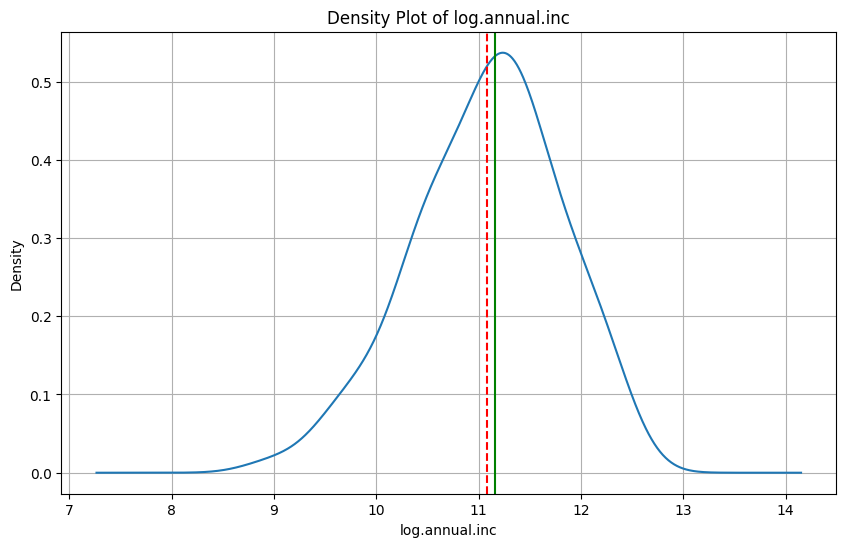

In [554]:
plot_density(df, col_name)
# # Density plot of data.
# mean_value = df[col_name].mean()
# median_value = df[col_name].median()

# plt.figure(figsize=(10, 6))
# df[col_name].plot(kind='density', title=f'Density Plot of {col_name}')
# plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
# plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
# # Adding annotations
# # plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value*1.3, 0.05), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
# # plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, 2.5), xytext=(median_value*1.3, 2.55), arrowprops=dict(facecolor='green', shrink=0.05), color='green')
                
# # plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 0), xytext=(mean_value + 0.5, 0.05),

# #                 arrowprops=dict(facecolor='red', shrink=0.05), color='red')
# # plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, 0), xytext=(median_value - 0.5, 0.05),
# #                 arrowprops=dict(facecolor='green', shrink=0.05), color='green')
# plt.xlabel(col_name)
# plt.ylabel('Density')
# plt.grid(True)
# plt.show()

A slightly left-skewed densit plot. The mean is slightly less than the median.

In [555]:
col_name = print_eda_start(df, next_col())

### EDA for **dti** - (6/14) 
 #### The debt-to-income ratio of the borrower (amount of debt divided by annual income).

In [556]:
df[col_name]

0     19.48
1     14.29
2     11.63
3      8.10
4     14.97
      ...  
95     5.00
96    20.00
97     0.72
98     2.44
99     9.66
Name: dti, Length: 100, dtype: float64

In [557]:
df[col_name].describe()

count    100.000000
mean       9.035000
std        5.981154
min        0.000000
25%        3.662500
50%        8.310000
75%       14.395000
max       22.090000
Name: dti, dtype: float64

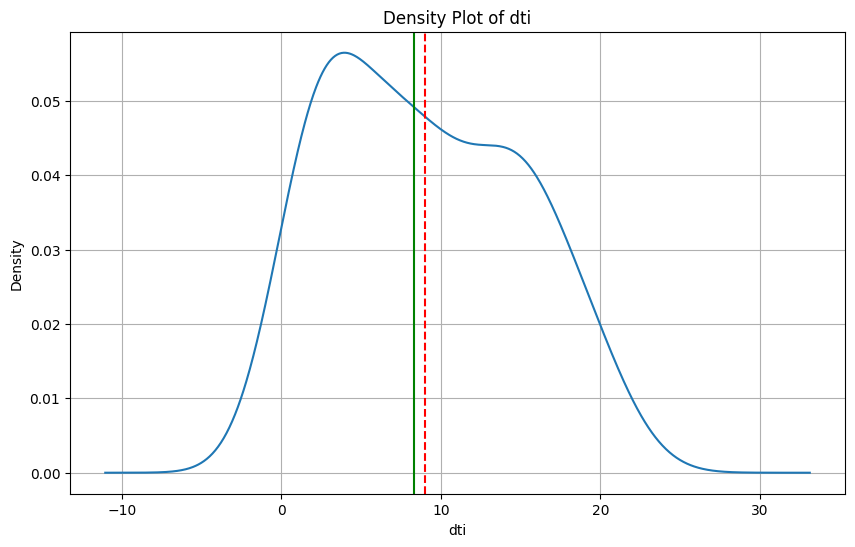

In [558]:
plot_density(df, col_name)

### Using adaptive kernel density estimation

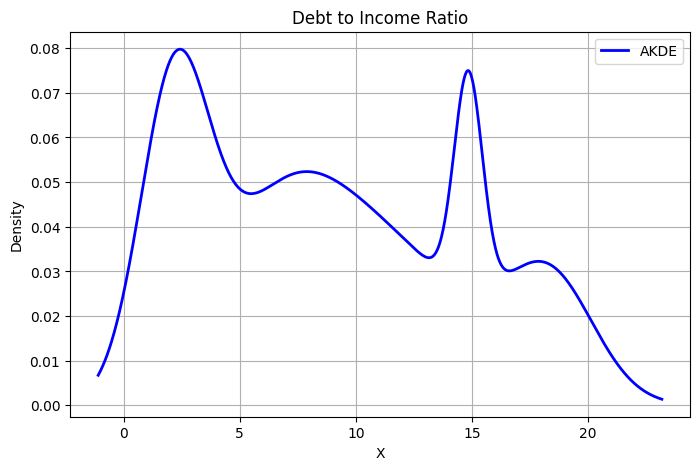

In [559]:
# using akde
from akde import akde

pdf, meshgrids, bandwith = akde(df[col_name].to_numpy().reshape(-1,1))
pdf = pdf.reshape(meshgrids[0].shape)

# Plot the density estimation, true distribution, and histogram
plt.figure(figsize=(8, 5))
plt.plot(meshgrids[0], pdf, label="AKDE", color='blue', linewidth=2)
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.title("Debt to Income Ratio")
plt.grid(True)
plt.show()

Note the difference between the two plots is that there is a higher proportion of the plot using the usual density estimate in the original plot compared to using AKDE.

In [560]:
col_name = print_eda_start(df, next_col())

### EDA for **fico** - (7/14) 
 #### The FICO credit score of the borrower.

In [561]:
df[col_name]

0     737
1     707
2     682
3     712
4     667
     ... 
95    762
96    727
97    787
98    792
99    792
Name: fico, Length: 100, dtype: int64

In [562]:
df[col_name].describe()

count    100.000000
mean     726.600000
std       44.854873
min      627.000000
25%      682.000000
50%      722.000000
75%      763.250000
max      812.000000
Name: fico, dtype: float64

The mean and median are similar. So one would expect a symmetric distribution.
The mean credit score is 726.6 and median credit score is 722.0.

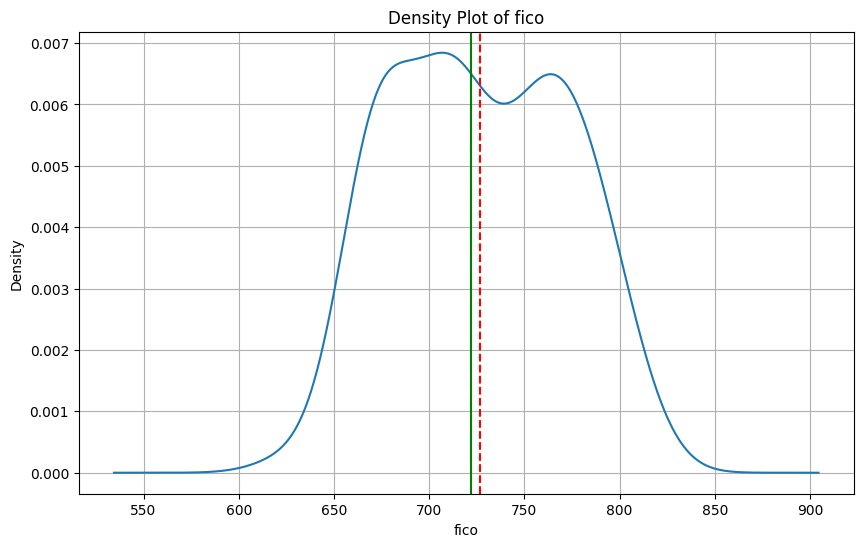

In [563]:
plot_density(df, col_name)

In [564]:
methods = ['skew', 'kurtosis']

skew_kurtosis = {method_name: getattr(df[col_name], method_name)() for method_name in methods}

for method_name, value in skew_kurtosis.items():
    print(f"{method_name}: {value}")

skew: 0.0518551289643743
kurtosis: -1.1047575590662


In [565]:
col_name = print_eda_start(df, next_col())

### EDA for **days.with.cr.line** - (8/14) 
 #### The number of days the borrower has had a credit line.

In [566]:
df[col_name]

0      5639.958333
1      2760.000000
2      4710.000000
3      2699.958333
4      4066.000000
          ...     
95     2131.000000
96    10292.000000
97     8010.000000
98     8717.958333
99     4529.000000
Name: days.with.cr.line, Length: 100, dtype: float64

In [567]:
df[col_name].describe()

count      100.000000
mean      4562.093750
std       2630.856598
min       1110.000000
25%       2684.968750
50%       4253.979166
75%       5840.000000
max      14008.958330
Name: days.with.cr.line, dtype: float64

The mean number of days borrower has had a line of credit is 4562 days and the median is 4253 days. The values are fairly similar so would expect the distribution to be symmetric.

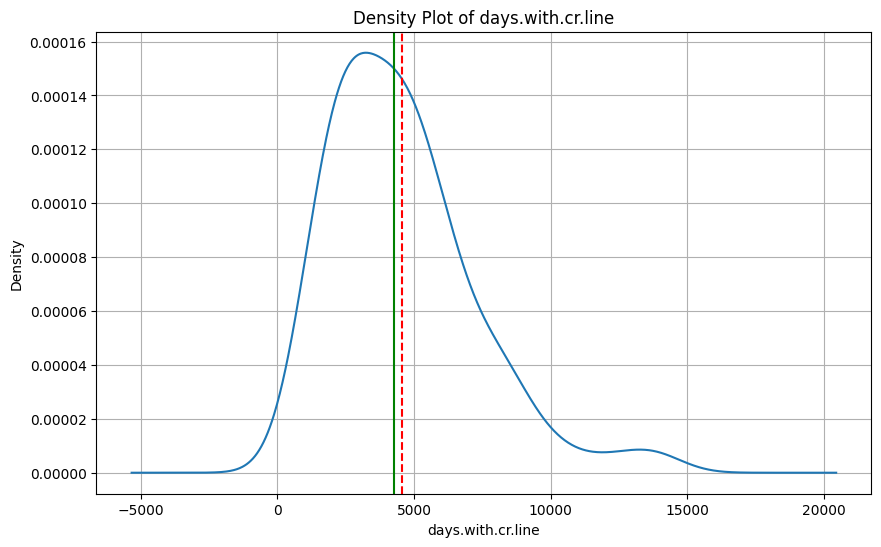

In [568]:
plot_density(df, col_name)

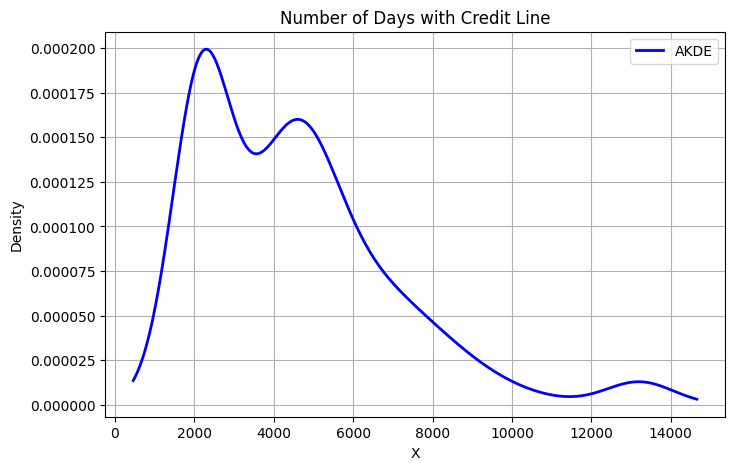

In [569]:
plot_akde(df, col_name, title="Number of Days with Credit Line")

In [570]:
col_name = print_eda_start(df, next_col())

### EDA for **revol.bal** - (9/14) 
 #### The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

In [571]:
df[col_name]

0      28854
1      33623
2       3511
3      33667
4       4740
       ...  
95      1359
96    107501
97      3054
98     40384
99    128000
Name: revol.bal, Length: 100, dtype: int64

In [572]:
df[col_name].describe()

count       100.000000
mean      17009.490000
std       22933.459903
min           0.000000
25%        3141.750000
50%        6678.500000
75%       22254.500000
max      128000.000000
Name: revol.bal, dtype: float64

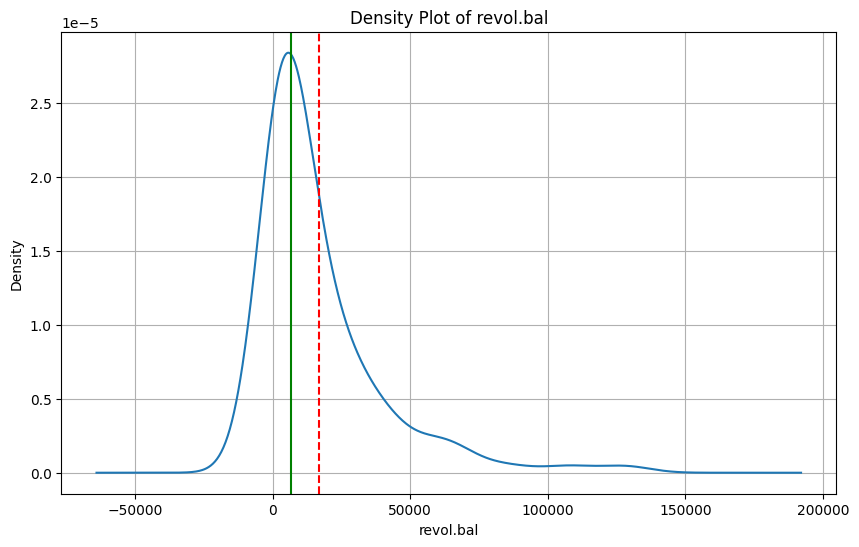

In [573]:
plot_density(df, col_name)

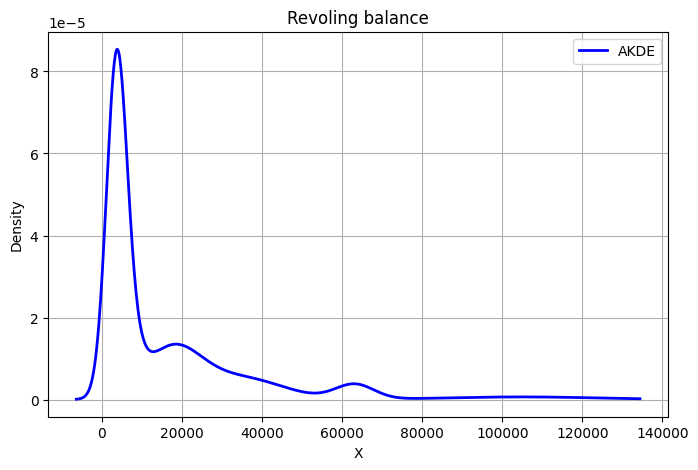

In [574]:
plot_akde(df, col_name, title="Revoling balance")
# pdf, meshgrids, bandwith = akde(df[col_name].to_numpy().reshape(-1,1))
# pdf = pdf.reshape(meshgrids[0].shape)
# akde(df[col_name].to_numpy().reshape(-1,1).astype(np.float64))

In [575]:
col_name = print_eda_start(df, next_col())

### EDA for **revol.util** - (10/14) 
 #### The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

In [576]:
df[col_name]

0     52.1
1     76.7
2     25.6
3     73.2
4     39.5
      ... 
95     5.6
96    44.8
97     5.6
98     9.6
99     0.0
Name: revol.util, Length: 100, dtype: float64

In [577]:
df[col_name].describe()

count    100.00000
mean      35.50000
std       26.17237
min        0.00000
25%       14.30000
50%       31.55000
75%       53.65000
max       93.40000
Name: revol.util, dtype: float64

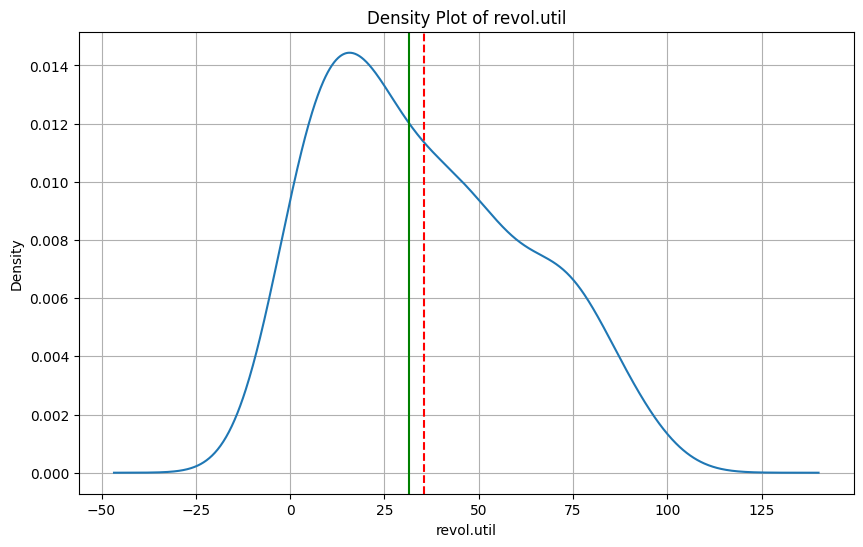

In [578]:
plot_density(df, col_name)

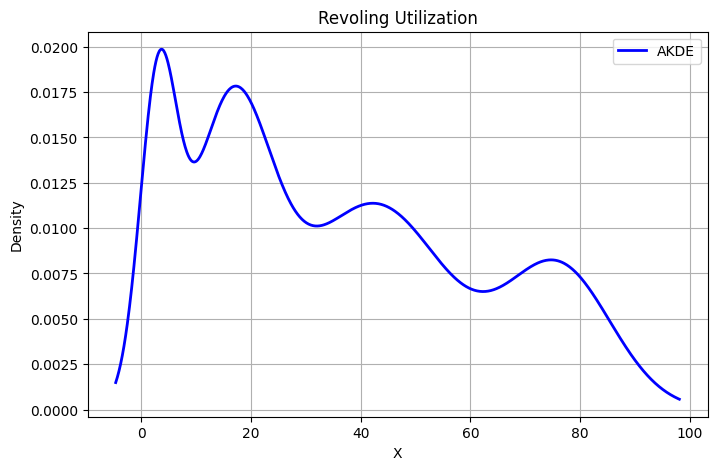

In [579]:
plot_akde(df, col_name, title="Revoling Utilization")

In [580]:
col_name = print_eda_start(df, next_col())

### EDA for **inq.last.6mths** - (11/14) 
 #### The borrower's number of inquiries by creditors in the last 6 months.

In [581]:
df[col_name]

0     0
1     0
2     1
3     1
4     0
     ..
95    2
96    2
97    3
98    0
99    3
Name: inq.last.6mths, Length: 100, dtype: int64

In [582]:
df[col_name].describe()

count    100.000000
mean       0.770000
std        1.033333
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: inq.last.6mths, dtype: float64

<Axes: xlabel='inq.last.6mths'>

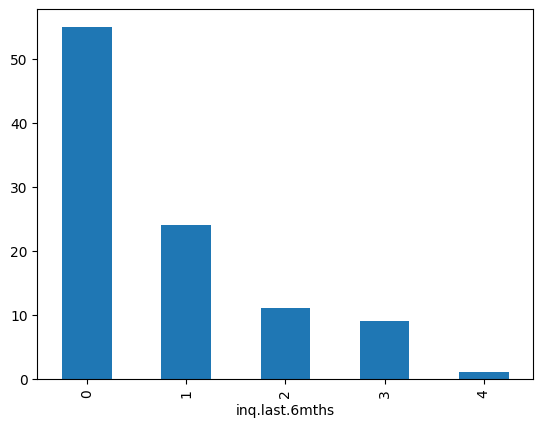

In [583]:
df[col_name].value_counts().plot(kind="bar")

In [584]:
df[col_name].value_counts(normalize=True)

inq.last.6mths
0    0.55
1    0.24
2    0.11
3    0.09
4    0.01
Name: proportion, dtype: float64

Over 50% of borrows had 0 enquiries by the bank in the last 6 months.

In [585]:
col_name = print_eda_start(df, next_col())

### EDA for **delinq.2yrs** - (12/14) 
 #### The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

In [586]:
df[col_name]

0     0
1     0
2     0
3     0
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: delinq.2yrs, Length: 100, dtype: int64

In [587]:
df[col_name].value_counts()

delinq.2yrs
0    89
1     9
2     2
Name: count, dtype: int64

In [588]:
counts_prop_df = df[col_name].value_counts().to_frame(name='Count').assign(Proportion=lambda df: df['Count'] / df['Count'].sum())
counts_prop_df

,Count,Proportion
delinq.2yrs,,
0,89,0.89
1,9,0.09
2,2,0.02


The majority of borrowers are on time with their repayments.

<Axes: title={'center': 'On time payment'}, xlabel='delinq.2yrs'>

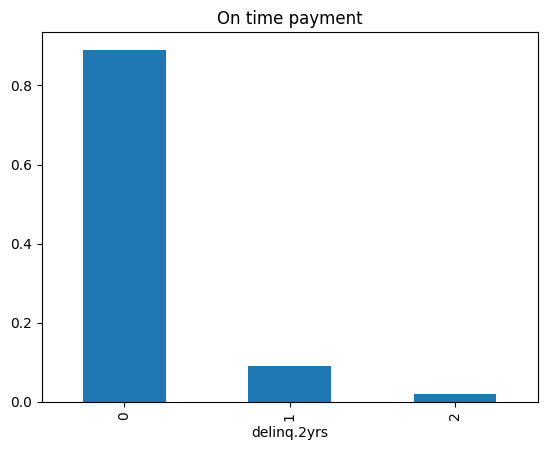

In [589]:
counts_prop_df['Proportion'].plot(kind='bar', title="On time payment")

In [590]:
col_name = print_eda_start(df, next_col())

### EDA for **pub.rec** - (13/14) 
 #### The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [591]:
df[col_name]

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: pub.rec, Length: 100, dtype: int64

In [592]:
bad_public_record_df = df[col_name].value_counts().to_frame(name='Count').assign(Proportion=lambda df: df['Count'] / df['Count'].sum())
bad_public_record_df

,Count,Proportion
pub.rec,,
0,94,0.94
1,6,0.06


In [593]:
bad_public_record_df.index = ["No", "Yes"]

bad_public_record_df

,Count,Proportion
No,94,0.94
Yes,6,0.06


<Axes: title={'center': 'Bad public record'}>

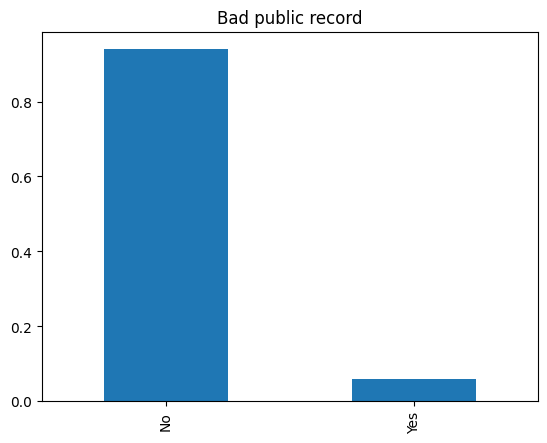

In [594]:
bad_public_record_df['Proportion'].plot(kind='bar', title="Bad public record")

Majority of borrowers have no bad public record.

In [595]:
next_col.display_internals()


next_column: 14
minimum: -0.1
maximum: 15


In [596]:
col_name = print_eda_start(df, next_col())

### EDA for **not.fully.paid** - (14/14) 
 #### No description available

In [597]:
df[col_name]

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: not.fully.paid, Length: 100, dtype: int64

In [599]:
df[col_name].value_counts()

not.fully.paid
0    90
1    10
Name: count, dtype: int64

Presumably this is if a borrower has not fully paid their debt. Given that 90% has a '0' label and presumably this indicated 'No', it means that 90% of borrowers has fully paid their debts.

In this example, we will be developing a model to predict the customers who have not fully paid the loan. Let’s explore the purpose and target column by using seaborn’s countplot. 

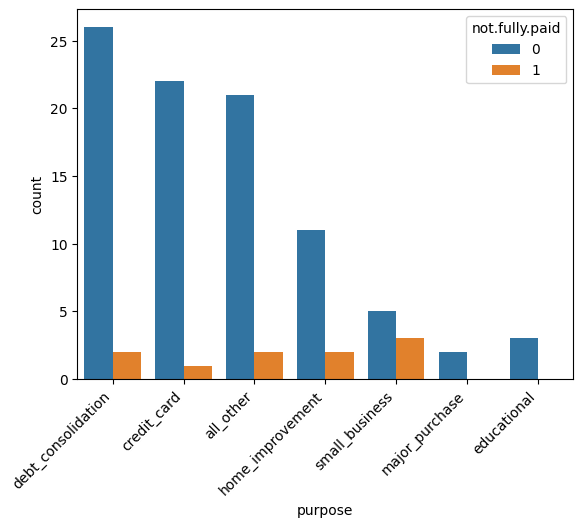

In [600]:
import seaborn as sns

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

What are the distribution of unpaid debts amongst the borrowing purposes?

In [ ]:
purpose_vs_paid_df = df[['purpose', 'not.fully.paid']]
# purpose_vs_paid_df.assign(not_fully_paid2 = purpose_vs_paid_df['not.fully.paid'].map({0: 'No', 1: 'Yes'}), inplace=True).groupby('purpose').value_counts()


,purpose,not.fully.paid
0,debt_consolidation,0
1,credit_card,0
2,debt_consolidation,0
3,debt_consolidation,0
4,credit_card,0
...,...,...
95,debt_consolidation,0
96,debt_consolidation,0
97,all_other,0
98,all_other,0


In [611]:
cross_tab = pd.crosstab(purpose_vs_paid_df['purpose'], purpose_vs_paid_df['not.fully.paid'])
cross_tab

not.fully.paid,0,1
purpose,,
all_other,21,2
credit_card,22,1
debt_consolidation,26,2
educational,3,0
home_improvement,11,2
major_purchase,2,0
small_business,5,3


### Data Processing 
We will now convert the ‘purpose’ column from categorical to integer using pandas `get_dummies` function.

In [612]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,index,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


After that, we will define feature (X) and target (y) variables, and split the dataset into training and testing sets. 


In [613]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [614]:
X

,index,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,True,False,False,False,False
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,True,False,False,False,False,False
2,2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False,False
3,3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,True,False,False,False,False
4,4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,False,True,False,False,False,False
96,96,1,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,False,True,False,False,False,False
97,97,1,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,False,False,False,False,False,False
98,98,1,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,False,False,False,False,False,False


### Model Building and Training

Model building and training is quite simple. We will be training a model on a training dataset using default hyperparameters. 

In [617]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

### Model Evaluation
We will use accuracy and f1 score to determine model performance, and it looks like the Gaussian Naive Bayes algorithm has performed quite well. 

In [618]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.9180327868852459


Due to the imbalanced nature of the data, we can see that the confusion matrix tells a different story. On a minority target: `not fully paid`, we have more mislabeled. 

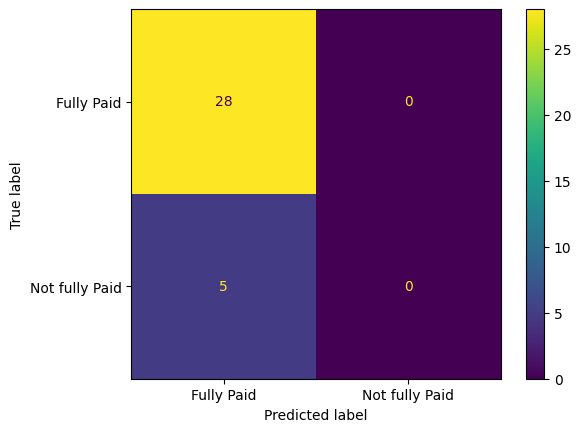

In [619]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
# %view df